[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//TransmissionLines/blob/master/PropagacionOndasMedios.ipynb)

# Propagación de ondas en medios dieléctricos y conductores

En este cuaderno se describen las características de la propagación de una onda de campo eléctrico en un medio dieléctrico o conductor.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/

Contenido:
1. Ondas Eléctricas.
2. Propagación en medios dieléctricos o conductores.
3. Efecto piel
<br>
Referencias.


## 1.Ondas Eléctricas

Una onda eléctrica monocromática (de frecuencia única) polarizada linealmente, que se propaga en un medio dieléctrico o conductor puede describirse en función del tiempo $t$ y la distancia $z$ mediante la siguiente ecuación:

<br>
$$\large E(z,t) = e^{-\alpha z} cos(\omega t - \beta z) \, [V/m]$$<br>

donde:
- $\alpha$ es la constante de atenuación de la onda $[1/m]$, en algunos textos se asocian las unidades Np/m donde Np es un Neper que es adimensional. <br>
- $E_0$ es la **amplitud** de la onda [V/m]. <br>
- $\omega$ es la frecuencia angular de la onda [rad/s]. <br>
- $\beta$ es la constante de fase de la onda [rad/m]. 

La **longitud de onda** $\lambda$ de la onda se relaciona con la frecuencia $f$ y la **velocidad de propagación** de la onda $v$ a través de la siguiente ecuación:

<br>
$$\large v = \lambda f$$<br>

Para una onda electromagnética que viaja en el vacío:

<br>
$$\large v = c = 3 \times 10^{8} \, [m/s]$$<br>

La *envolvente* de la señal es la función $e^{-\alpha z}$ y determina la amplitud de la onda.

### Onda en el tiempo

La frecuencia angular se calcula de la siguiente forma:

<br>
$$\large \omega = 2\pi f$$<br>

La relación entre la frecuencia $f$ y el perido de la onda $T$ es:
$$\large T = 1/f$$<br>


### Onda en el espacio

La constante de fase se calcula de la siguiente forma:

<br>
$$\large \beta = 2\pi / \lambda$$<br>

En la siguiente figura se observa como se propaga el campo eléctrico en el vacío, en función del tiempo y el espacio, al variar diferentes parámetros.

- ¿Qué ocurre con la longitud de onda al incrementar la frecuencia?
- ¿Qué ocurre con el periodo de la señal al incrementar la frecuencia?



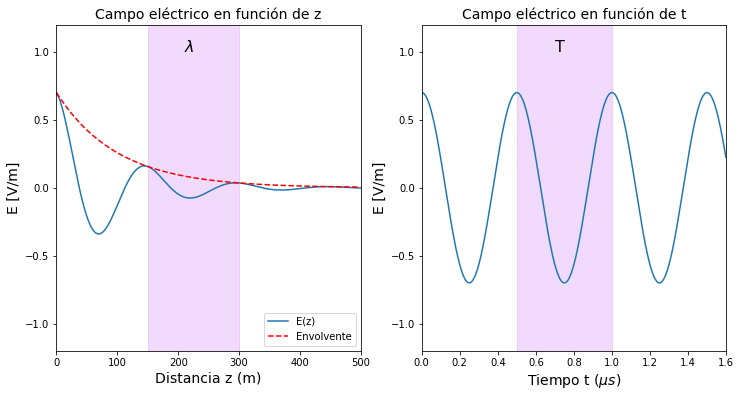

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

Amplitud_Eo = 0.7 #@param {type:"slider", min:0.1, max:1, step:0.1}
Frecuencia_f_MHz = 2 #@param {type:"slider", min:1, max:5, step:1}
alpha = 0.01 #@param {type:"slider", min:0, max:0.02, step:0.001}

f = Frecuencia_f_MHz*1e6
T = 1/f
v = 3e8
lambd = v/f
beta = 2*np.pi/lambd
omega = 2*np.pi*f

z = np.arange(0,500,1)
t = np.arange(0,16e-7,1e-9)

Env = Amplitud_Eo*np.exp(-alpha*z)

Ez = Env*np.cos(beta*z)
Et = Amplitud_Eo*np.cos(omega*t)

rec_t = plt.Rectangle((T/1e-6, -1.2), T/1e-6, 2.4, color='#d187f5',alpha=0.3)
rec_z = plt.Rectangle((lambd, -1.2), lambd, 2.4, color='#d187f5',alpha=0.3)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].axis([0, 500, -1.2, 1.2])
ax[0].add_artist(rec_z)
ax[0].annotate('$\lambda$', xy=(1.4*lambd, 1.0), xytext=(1.4*lambd, 1.0), size = 16) 
ax[0].plot(z, Ez, label='E(z)')
ax[0].plot(z, Env, 'r--',label='Envolvente')
ax[0].set_xlabel('Distancia z (m)', fontsize=14)
ax[0].set_ylabel('E [V/m]', fontsize=14)
ax[0].set_title('Campo eléctrico en función de z', fontsize=14)
ax[0].legend(loc='lower right')

ax[1].axis([0, 1.6, -1.2, 1.2])
ax[1].add_artist(rec_t)
ax[1].annotate('T', xy=(1.4*T/1e-6, 1.0), xytext=(1.4*T/1e-6, 1.0), size = 16) 
ax[1].plot(t/1e-6, Et)
ax[1].set_xlabel('Tiempo t ($\mu s$)', fontsize=14)
ax[1].set_ylabel('E [V/m]', fontsize=14)
ax[1].set_title('Campo eléctrico en función de t', fontsize=14)

fig.show()

## 2.Propagación en medios eléctricos

Se presentan las principales características, desde el punto de vista eléctrico, para identificar un buen aislante de un buen conductor, lo cual depende del material y de la frecuencia de la onda electromagnetica que se propaga a través de este.

### 2.1. Constante de propagación.

La constante de propagación para un medio eléctrico se define como:
$$\large \gamma = \alpha + j\, \beta \, [1/m]$$ <br>

Los valores de $\alpha$ y $\beta$ se hallan resolviendo las ecuaciones de Maxwell obteniendo:
$$\alpha = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}-1 \right)^{1/2} \, [Np/m]$$

$$\beta = \frac{\omega \sqrt{\mu \epsilon}}{\sqrt{2}} \left(\sqrt{1 + \left(\frac{\sigma}{\omega \epsilon}\right)^2}+1 \right)^{1/2} \, [rad/m]$$

donde:
- $\gamma$ es la constante de propagación de la onda [1/m] <br>
- $\sigma$ es la conductividad [S/m], S = Siemen, $S = 1/\Omega$ <br>
- $\epsilon$ es la permitividad del medio [F/m] <br>
- $\mu$ es la permeabilidad del medio [H/m]

La permitividad del material $\epsilon$ se calcula a partir de la permitividad del vacío $\epsilon_0$ y la permitividad relativa del material $\epsilon_r$ que se encuentra tabulada disponible en la web o en libros especializados:

$$\epsilon = \epsilon_0 \cdot \epsilon_r$$<br>

donde la permitividad del vacío:

$$\epsilon_0 = 8.8542 \times 10^{-12} \, [F/m]$$<br>

In [ ]:
e0 = 8.8542e-12;

La permeabilidad del material $\mu$ se calcula a partir de la permeabilidad del vacío $\mu_0$ y la permeabilidad relativa del material $\mu_r$ que se encuentra tabulada disponible en la web o en libros especializados:

$$\mu = \mu_0 \cdot \mu_r$$<br>

donde la permeabilidad del vacío:

$$\mu_0 = 4\pi \times \, 10^{-7} = 1.2566 \times 10^{-6} \, [H/m]  $$<br>

In [ ]:
u0 = 1.2566e-6;

Otras ecuaciones que pueden emplearse para todos los tipos de materiales son:


$$\large v = \lambda \, f = \frac{\omega}{\beta} \, [m/s]$$<br>
$$\large \beta = \frac{2 \, \pi}{\lambda} \, [rad/m]$$<br>
$$\large \delta = \frac{1}{\alpha} \, [m]$$<br>
$$\large \sigma = \frac{1}{\rho} \, [S/m]$$
donde: <br>

- $\delta$ es la profundidad de penetración [m] <br>
- $\rho$ es la resistividad del material [$\Omega$.m] <br>

### 2.2.Tangente de pérdidas.

Para calcular las características de propagación de las ondas, primero debe determinarse si el medio se comporta como buen dieléctrico o buen conductor.
Esto se realiza calculando la **tangente de pérdidas**:
$$\large tan \, \delta = \frac{\sigma}{\omega \epsilon}$$
El valor de la tangente de perdidas determinará el comportamiento del material, si:
- $tan \, \delta > 100$ el material se comporta como buen conductor <br>
- $tan \, \delta < 1/100$ el material se comporta como buen dieléctrico <br>
- En otro caso el material se comporta como buen semiconductor.

### 2.3.Buenos dieléctricos

En un buen dieléctrico se cumple $tan \, \delta < 1/100$<br>

Por ejemplo, una onda de RF a través de polietileno:
- Frecuencia 1 kHz
- $\epsilon_r = 2.6$
- $\mu_r = 1$
- $tand = 0.20 \times 10^{-3}$

**Ejercicio**

Graficar el campo eléctrico en función de la distancia. Incluir la gráfica de la envolvente.

### 2.4. Buenos conductores

En un buen conductor se cumple $tan \, \delta > 100$.

Por ejemplo, una onda de RF propagándose a través del cobre:
- Frecuencia 1 GHz
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]

**Ejercicio**

Graficar el campo eléctrico en función de la distancia. Incluir la gráfica de la envolvente.

### 2.5.Ejercicio interactivo: dependencia de la frecuencia.

Graficar el campo eléctrico en función de la frecuencia de la onda que atravieza un conductor como el cobre. Varíe la frecuencia entre 1 y 10001 PHz en pasos de 1000 PHz.

Características del cobre:
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]

## 3.Efecto piel.

El efecto piel se observa en buenos conductores, cuando se cumple $tan \, \delta > 100$.

Cuando la onda electromagnética incide en un conductor, penetra una distancia $\delta$, dada por:

$$\large \delta = \frac{1}{\alpha} \, [m]$$<br>

donde:
- $\delta$ es la profundidad de penetración [m] <br>
- $\alpha$ es la constante de atenuación de la onda [1/m]

Esto indica que en un conductor que transporta corriente, la corriente se distribuye sobre la suerficie o piel del conductor, siendo el grosor de esa piel el valor $\delta$.

Cuando $z=\delta$, el valor del campo eléctrico a caido a un valor igual a:

$$ E = e^{-\alpha \delta} = e^{-1} = 0.37 \, V/m$$

0.37 veces su valor inicial.



#### Ejercicio interactivo.

Observemos el efecto piel en un conductor de cobre, en un cilindro de diferente radio. 
Lo parámetros del cobre:
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]

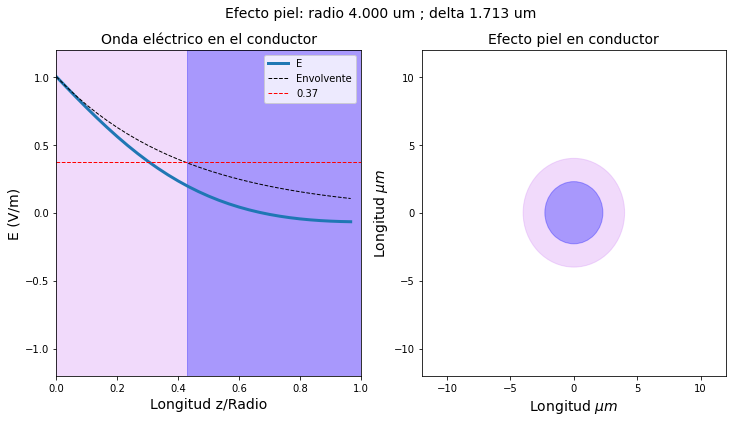

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Frecuencia_kHz = 2879  #@param {type: "slider", min: 100, max: 10000}
Radio_um = 4  #@param {type: "slider", min: 1, max: 10}

e0 = 8.8542e-12;
u0 = 1.2566e-6;
er = 1;
ur = 1;
sigma = 3e7;
Radio = Radio_um*1e-6;

omega = 2*np.pi*Frecuencia_kHz*1e6;
e = e0*er;
u = u0*ur;
tand = sigma/(omega*e);
alpha = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)-1);
beta  = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)+1);
delta = 1/alpha
lambd = 2*np.pi/beta

z = np.arange(0, Radio, Radio/30)
Env = np.exp(-alpha*z)
Ezp = Env*np.cos(-beta*z)

if delta>=Radio:
  Rin = Radio
else:
  Rin = delta

f, ax = plt.subplots(1, 2, figsize=(12, 6))

rec_r = plt.Rectangle((0, -1.2), 1, 2.4, color='#d187f5',alpha=0.3)
rec_b = plt.Rectangle((Rin/Radio, -1.2), 1-Rin/Radio, 2.4, color='b',alpha=0.3)
ax[0].add_artist(rec_r)
ax[0].add_artist(rec_b)

ax[0].plot(z/Radio, Ezp,label='E',lw=3)
ax[0].plot(z/Radio, Env,'k--',label='Envolvente',lw=1)
ax[0].plot([0, 1], [0.37, 0.37], 'r--', lw=1, label='0.37')

ax[0].axis([0, 1, -1.2, 1.2])
ax[0].set_xlabel('Longitud z/Radio', fontsize=14)
ax[0].set_ylabel('E (V/m)', fontsize=14)
ax[0].legend()
ax[0].set_title('Onda eléctrico en el conductor', fontsize=14)

cir_total = plt.Circle((0, 0), Radio*1e6, color='#d187f5', alpha=0.3)
cir_piel = plt.Circle((0, 0), (Radio-Rin)*1e6, color='b', alpha=0.3)

ax[1].axis([-12, 12, -12, 12])
ax[1].add_artist(cir_total)
ax[1].add_artist(cir_piel)
ax[1].set_xlabel('Longitud $\mu m$', fontsize=14)
ax[1].set_ylabel('Longitud $\mu m$', fontsize=14)
ax[1].set_title('Efecto piel en conductor', fontsize=14)

f.suptitle('Efecto piel: radio %.3f um ; delta %.3f um' % (Radio/1e-6,delta/1e-6), fontsize=14)
f.show()
#print('radio : %.3f um ; delta : %.3f um' % (Radio/1e-6,delta/1e-6))

## Referencias

- Engineering Electromagnetic Fields and Waves (Inglés) 2nd Edición. Carl T. A. Johnk.